# Round 0 decision tree/random forest (rev 2)
Dtree and rf code source: [Jose Portilla Udemy course](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/)  
Heat map visualization code: [JR Kreiger on Medium](https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56) and [Dennis T on Medium](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)  
Feature importance code: [scikit-learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# 'pyr_four_nostr.csv' is the original classifier train set
# 'pyr_four_nostr_mmstats.csv' adds in 10 additional mito-to-mito distance statistics

pyr_four = pd.read_csv('pyr_four_nostr_mmstats.csv', index_col=[0])

In [5]:
# split test size
testsize = 0.30

# number of estimators
n_est = 100

# random state
random_st = 1

# decision tree classifier conditions
min_sampleaf = 1
min_sampsplit = 2 
min_weightfractionleaf = 0.0

## Test-train-split using random state = 1 (from above variables)

In [6]:
X = pyr_four.drop('compartment',axis=1)
y = pyr_four['compartment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=random_st)

## Decision tree

In [7]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=min_sampleaf,
            min_samples_split=min_sampsplit, min_weight_fraction_leaf=min_weightfractionleaf,
            random_state=random_st, splitter='best')

DecisionTreeClassifier(random_state=1)

## Dtree confusion matrix and classification report

In [11]:
predictions = dtree.predict(X_test)

In [12]:
print(confusion_matrix(y_test,predictions))

[[ 4762    82   902   216]
 [   59  2726   832   134]
 [  909   749 14013   863]
 [  233   152   869 26771]]


In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Apical       0.80      0.80      0.80      5962
      Axonal       0.73      0.73      0.73      3751
       Basal       0.84      0.85      0.85     16534
     Somatic       0.96      0.96      0.96     28025

    accuracy                           0.89     54272
   macro avg       0.83      0.83      0.83     54272
weighted avg       0.89      0.89      0.89     54272



# Tree visualization

In [29]:
# fixed error with deprecated sklearn.exterals.six
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 

import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.externals.six import StringIO

In [30]:
features = list(pyr_four.columns[1:])
features

['mito_vx',
 'ctr_pos_x_vx',
 'ctr_pos_y_vx',
 'ctr_pos_z_vx',
 'bbox_beg_x_vx',
 'bbox_beg_y_vx',
 'bbox_beg_z_vx',
 'bbox_end_x_vx',
 'bbox_end_y_vx',
 'bbox_end_z_vx',
 'cellid',
 'ctr_pos_x_nm',
 'ctr_pos_y_nm',
 'ctr_pos_z_nm',
 'surface_area',
 'complexityindex',
 'compartment',
 'centroid_x',
 'centroid_y',
 'centroid_z',
 'ctr_distance_to_soma',
 'bbox_dir_x',
 'bbox_dir_y',
 'bbox_dir_z',
 'bbox_distance',
 'above_soma',
 'within_threshold_1500',
 'count',
 'mean',
 'std',
 'min',
 '25%',
 '50%',
 '75%',
 'max',
 'kurtosis',
 'skew']

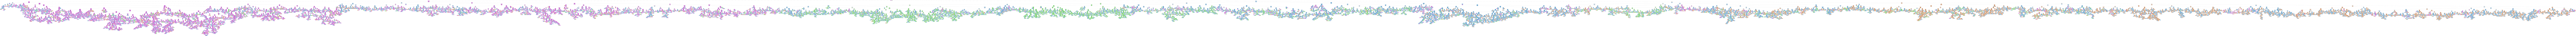

In [31]:
# uncomment to run; the visualization is not legible

# dot_data = StringIO()  
#export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# Image(graph[0].create_png()) 

## Random forest using random state 1

In [14]:
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_st)
rfc.fit(X_train, y_train)
elapsed_time = time.time() - start_time

In [15]:
print(f"Elapsed time to compute the Random Forest Classifer: {elapsed_time:.3f} seconds")

Elapsed time to compute the Random Forest Classifer: 65.829 seconds


## Rf confusion matrix and classification report

In [16]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[ 4805    29   915   213]
 [   39  2958   606   148]
 [  479   366 14951   738]
 [   35    12   296 27682]]


In [17]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Apical       0.90      0.81      0.85      5962
      Axonal       0.88      0.79      0.83      3751
       Basal       0.89      0.90      0.90     16534
     Somatic       0.96      0.99      0.97     28025

    accuracy                           0.93     54272
   macro avg       0.91      0.87      0.89     54272
weighted avg       0.93      0.93      0.93     54272



# Heat map visualization of classification accuracy

# things to check
- line 2 of matrix in next cell; is the correct way to calculate, or should use f1 score directly
- note the difference between f1 scores above and the accuracy values in the heat map below
- group_names are correct categories for the confusion matrix label


In [33]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rfc_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# coding help from https://www.appsloveworld.com/pandas/100/31/python-remove-brackets-from-arrays
cm = confusion_matrix(y_test,rfc_pred)
coef = np.array(cm).ravel()
# coef

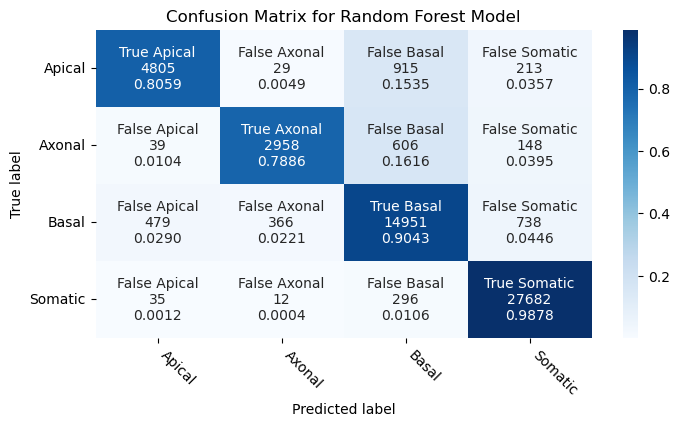

In [34]:
group_names = ['True Apical','False Axonal','False Basal','False Somatic',
          'False Apical','True Axonal','False Basal','False Somatic',
          'False Apical','False Axonal','True Basal','False Somatic',
          'False Apical','False Axonal','False Basal','True Somatic']
group_counts = ["{0:0.0f}".format(value) for value in
                coef.flatten()]
group_percentages = ["{0:.4f}".format(value) for value in
                     matrix.flatten()]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(4,4)

plt.figure(figsize=(8,4))
sns.heatmap(matrix, annot=labels, annot_kws={'size':10}, fmt='', cmap='Blues')

# Add labels to the plot
class_names = ['Apical','Axonal','Basal','Somatic']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks+0.5, class_names, rotation=-45, ha='left')
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Feature importance
Source: [scikit-learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)

## based on mean decrease in impurity

In [18]:
X_colnames = [str(X.columns[i]) for i in range(X.shape[1])]

In [19]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

start_time = time.time()
feature_names = X_colnames
forest = RandomForestClassifier(random_state=random_st)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

In [20]:
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 65.913 seconds


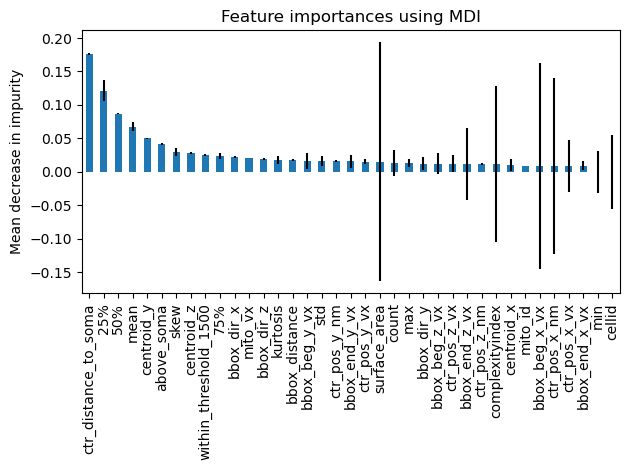

In [21]:
forest_importances = pd.Series(importances, index=feature_names)

# create pareto bar chart
forest_importances_pareto = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances_pareto.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## based on feature permutation

In [25]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=random_st, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances_perm = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 229.941 seconds


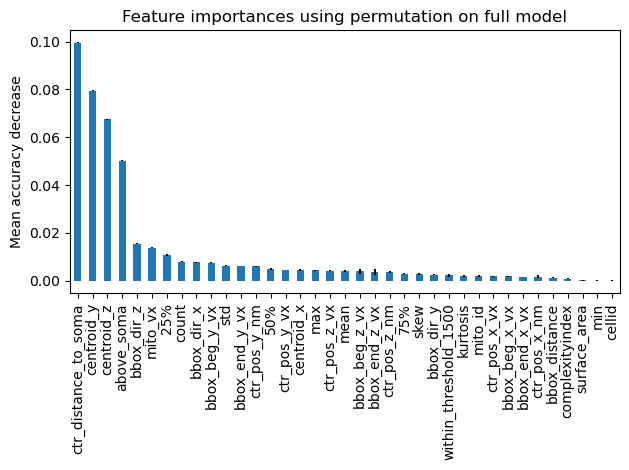

In [26]:
forest_importances_perm_pareto = forest_importances_perm.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances_perm_pareto.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()